In [15]:
%matplotlib notebook

import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)

In [16]:
dfa = pd.read_csv("/home/marcos/OneDrive/home/ETSIT/tercero/irin/o1/dev/irsim2021/outputFiles/avoidOutput", sep=" ", header=0, names=["time", "prox[0]", "prox[1]", "prox[2]", "prox[3]", "prox[4]", "prox[5]", "prox[6]", "prox[7]", "fMaxProx", "fRepelent", "act", "theta", "rho"])
dfdh = pd.read_csv("/home/marcos/OneDrive/home/ETSIT/tercero/irin/o1/dev/irsim2021/outputFiles/deliverHighOutput", sep=" ", header=0, names=["time","fLoadInhibitor","packetsDelivered","light[0]","light[1]","light[2]","light[3]","light[4]","light[5]","light[6]","light[7]","act","theta","rho"])
dfdl = pd.read_csv("/home/marcos/OneDrive/home/ETSIT/tercero/irin/o1/dev/irsim2021/outputFiles/deliverLowOutput", sep=" ", header=0, names=["time","fLoadInhibitor","packetsDelivered","light[0]","light[1]","light[2]","light[3]","light[4]","light[5]","light[6]","light[7]","act","theta","rho"])
dfl = pd.read_csv("/home/marcos/OneDrive/home/ETSIT/tercero/irin/o1/dev/irsim2021/outputFiles/loadOutput", sep=" ", header=0, names=["time", "packetsLoaded", "blueBattery[0]", "blueLight[0]", "blueLight[1]", "blueLight[2]", "blueLight[3]", "blueLight[4]", "blueLight[5]", "blueLight[6]", "blueLight[7]", "act","theta","rho"])
dfn = pd.read_csv("/home/marcos/OneDrive/home/ETSIT/tercero/irin/o1/dev/irsim2021/outputFiles/navigateOutput", sep=" ", header=0, names=["time", "act", "theta", "rho"])
dfb = pd.read_csv("/home/marcos/OneDrive/home/ETSIT/tercero/irin/o1/dev/irsim2021/outputFiles/behaviorOutput", sep=" ", header=0, names=["time", "beh"])
dfb['act'] = dfb['beh'].map(lambda a: 1.0 if a == 1 else 0)

#for i in [dfa, dfdh, dfdl, dfl, dfn]:
#    print(i.describe())
    
df = pd.DataFrame()
df["time"] = dfa["time"]
df["act_n"] = dfn["act"]
df["act_dh"] = dfdh["act"]
df["act_dl"] = dfdl["act"]
df["act_l"] = dfl["act"]
df["act_a"] = dfa["act"]
df.describe()

dfc = pd.DataFrame(columns=["time", "activation"])
dfs = [dfa, dfdh, dfdl, dfl, dfb, dfn]
datatypes = {
    0: "avoid",
    1: "deliver_h",
    2: "deliver_l",
    3: "load",
    4: "gohome",
    5: "navigate"
}
for d in range(len(dfs)):
    data = dfs[d]
    #print(data)
    ty = datatypes[d]
    #print(ty)
    for i in range(data.shape[0]):
        row = data.iloc[i]
        #print(row["time"], row["act"])
        if row["act"] > 0.01:
            dfc = dfc.append({"time": row["time"], "activation": ty}, ignore_index=True)
dfc = dfc.sort_values(by=["time"])

<IPython.core.display.Javascript object>


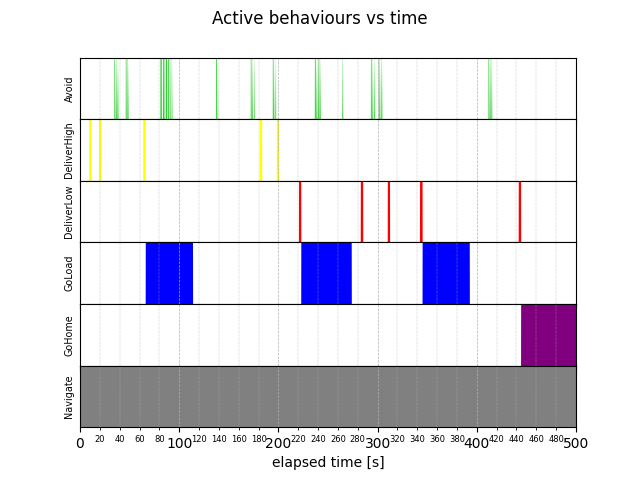

In [17]:
fig, axes_tup = plt.subplots(len(dfs), sharex=True, sharey=True, squeeze=True, gridspec_kw={"hspace": 0})

In [18]:
fig.suptitle('Active behaviours vs time')
axes_tup[0].yaxis.set_major_locator(plt.NullLocator())
axes_tup[0].autoscale(enable=True, axis='both', tight=True)
axes_tup[0].set_xlim([0, 500])
axes_tup[0].minorticks_on()

In [19]:
colors=["limegreen", "yellow", "red", "blue", "purple", "gray"]
for i in range(len(axes_tup)):
    dft = dfs[i]
    dft.plot.area(x="time", y="act", ax=axes_tup[i], legend=False, stacked=True, lw=0, color=colors[i])

In [20]:
axes_tup[5].set_xlabel("elapsed time [s]")
axes_tup[5].xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
axes_tup[5].tick_params(axis='x', which='minor', labelsize=6)
dt_text = {
    0: "Avoid",
    1: "DeliverHigh",
    2: "DeliverLow",
    3: "GoLoad",
    4: "GoHome",
    5: "Navigate"
}
for i in range(len(dfs)):
    axes_tup[i].set_ylabel(dt_text[i], fontsize="x-small")

In [21]:
for ax in axes_tup:
    ax.grid(linestyle='--', linewidth=0.5, which="major")
    ax.grid(linestyle='-.', linewidth=0.25, which="minor")

In [8]:
fig.savefig("time_beh.pdf", bbox_inches='tight')

# Battery vs charge

<IPython.core.display.Javascript object>


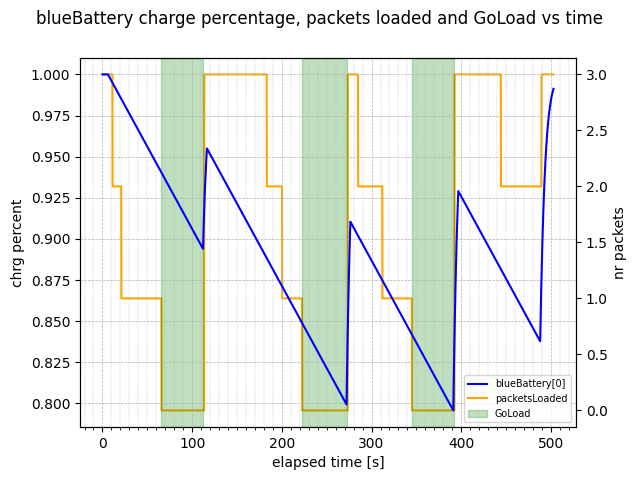

In [22]:
fig = plt.figure()
ax = fig.gca()
bat = dfl.plot(x="time", y="blueBattery[0]", ax=ax, c="blue", legend=False)
ax2 = ax.twinx()
pack = dfl.plot(x="time", y="packetsLoaded", ax=ax2, c="orange", legend=False)
ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)

In [23]:
ch_regions = []
for i in range(1, dfl.shape[0]):
    rowp = dfl.iloc[i-1]
    rown = dfl.iloc[i]
    if rowp["act"] != rown["act"]:
        ch_regions.append(rowp["time"])

In [24]:
ch_regions = list(zip(*[iter(ch_regions)] * 2))
ch_regions

[(65.7, 113.4), (222.5, 273.4), (344.8, 392.4)]

In [25]:
for i, pair in enumerate(ch_regions):
    avs = ax.axvspan(pair[0], pair[1]-1, alpha=0.25, color='green', label = "GoLoad")

In [26]:
ax.set_xlabel("elapsed time [s]")
ax.set_ylabel("chrg percent")
ax2.set_ylabel("nr packets")
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.tick_params(axis='both', which='minor', labelsize=6)
ax.grid(linestyle='--', linewidth=0.5, which="major")
ax.grid(linestyle='-.', linewidth=0.25, which="minor")
fig.suptitle('blueBattery charge percentage, packets loaded and GoLoad vs time')
lns = [bat.get_lines()[0]] +[pack.get_lines()[0]] + [avs]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize="x-small", loc="lower right")

In [14]:
fig.savefig("time_load.pdf", bbox_inches='tight')